# Retention Analysis

- The data, given in json format, has been imported and we can see that all columns mentioned in the writeup are part of the resulting dataframe.
- Immediately after the dataframe is created, it has been saved as  a csv file titled "Retention.csv".
- The "Data Quality Report" will be available as a document in the github repository.
- Further analysis on the each column has been performed - this includes cleaning the data in columns "age" and "gross_income" to make them numeric. Categorical columns have been dummy-encoded.
- Missing values were treated.
- Outliers were removed.
- This data, after applying above steps, is saved as a separate csv file, "Processesed_data.csv"

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_data=pd.read_json("retention.json",orient='index') #read json file for raw data, orient is used so that the dataframe is created correctly.

In [3]:
raw_data.head() #raw data in dataframe format

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [4]:
raw_data.to_csv("Retention.csv",index=False)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 54030 non-null  object
 1   age                    54030 non-null  object
 2   gross_income           54030 non-null  object
 3   segment                54030 non-null  object
 4   num_credit_cards       54030 non-null  int64 
 5   tiprel_1mes            54030 non-null  object
 6   ind_actividad_cliente  54030 non-null  int64 
 7   num_Products           54030 non-null  int64 
 8   num_loans              54030 non-null  int64 
 9   duration               54030 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.5+ MB


In [6]:
raw_data.gender.value_counts() #check for any anomalies in the column

F    29681
M    24349
Name: gender, dtype: int64

In [7]:
raw_data.age.describe() #this column needs to be processed to make it numeric, and so that missing values can be detected.

count        54030
unique         110
top       23 years
freq          3080
Name: age, dtype: object

In [8]:
raw_data.segment.value_counts() #categorical column that needs to be encoded. No missing values/anomalies

Individuals          32607
College_Graduated    18963
VIP                   2460
Name: segment, dtype: int64

In [9]:
raw_data.num_credit_cards.value_counts() #numeric column, no missing values

0    51335
1     2695
Name: num_credit_cards, dtype: int64

In [10]:
raw_data.tiprel_1mes.value_counts() #categorical column, needs to be encoded. no missing values

I    29026
A    25004
Name: tiprel_1mes, dtype: int64

In [11]:
data_1 = raw_data.copy()

In [12]:
#process the age and gross_income columns to make them numeric in nature, removing "years" from age and "$" from gross_income
from tqdm import tqdm
for row in tqdm(data_1.iterrows()):
    row[1].age = row[1].age.split(" ")[0]
    data_1.age[row[0]] = row[1].age
    row[1].gross_income = row[1].gross_income.split(" ")[1]
    data_1.gross_income[row[0]] = row[1].gross_income

0it [00:00, ?it/s]<ipython-input-12-b80955b84444>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.age[row[0]] = row[1].age
<ipython-input-12-b80955b84444>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.gross_income[row[0]] = row[1].gross_income
54030it [02:18, 390.59it/s]


In [13]:
data2 = data_1.copy()

In [14]:
#changing data type of the two columns to int and float - since there are no errors here, this means there are no abnormal values in the columns
data2.age = data2.age.astype('int')
data2.gross_income = data2.gross_income.astype('float')

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int32  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   tiprel_1mes            54030 non-null  object 
 6   ind_actividad_cliente  54030 non-null  int64  
 7   num_Products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 6.3+ MB


In [16]:
data3=pd.get_dummies(data2, columns = ['gender','segment','tiprel_1mes'],drop_first=True) #dummy encode categorical columns

In [17]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54030 entries, 0 to 54029
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    54030 non-null  int32  
 1   gross_income           54030 non-null  float64
 2   num_credit_cards       54030 non-null  int64  
 3   ind_actividad_cliente  54030 non-null  int64  
 4   num_Products           54030 non-null  int64  
 5   num_loans              54030 non-null  int64  
 6   duration               54030 non-null  int64  
 7   gender_M               54030 non-null  uint8  
 8   segment_Individuals    54030 non-null  uint8  
 9   segment_VIP            54030 non-null  uint8  
 10  tiprel_1mes_I          54030 non-null  uint8  
dtypes: float64(1), int32(1), int64(5), uint8(4)
memory usage: 5.3 MB


<AxesSubplot:xlabel='age'>

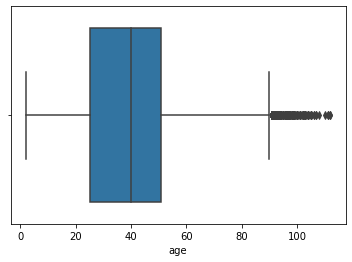

In [18]:
#checking for and removing outliers in various columns
import seaborn as sns
sns.boxplot(x=data3.age) #age more than ~90 is outlier.

<AxesSubplot:xlabel='age', ylabel='Count'>

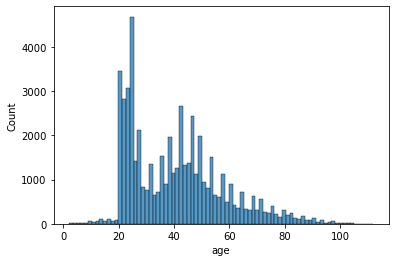

In [19]:
sns.histplot(x=data3.age)

In [20]:
data4 = data3[~(data3.age<20) & ~(data3.age>90)] #removing age outliers from both lower and higher side

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

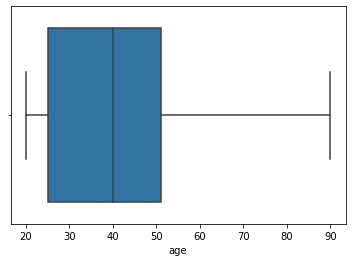

In [21]:
sns.boxplot(data4.age)

<AxesSubplot:xlabel='gross_income'>

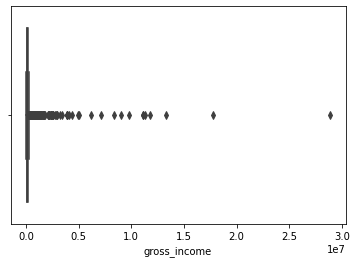

In [22]:
sns.boxplot(x=data4.gross_income) #gross_income has many outliers - while the boxplot suggests limiting the values to around 225,000, 
#we will take values up to 500,000 to remove only very extreme outliers.

<AxesSubplot:xlabel='gross_income'>

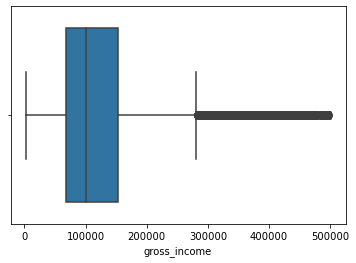

In [23]:
sns.boxplot(x=data4[data4.gross_income<500000].gross_income)

In [24]:
data4[data4.gross_income>500000]

,age,gross_income,num_credit_cards,ind_actividad_cliente,num_Products,num_loans,duration,gender_M,segment_Individuals,segment_VIP,tiprel_1mes_I
41,53,1415413.26,0,1,3,0,1497,0,1,0,0
76,26,823727.49,0,0,1,0,1763,1,0,0,1
142,61,698086.14,0,0,1,0,3133,0,1,0,1
160,42,664041.21,0,1,6,0,4269,0,1,0,0
247,31,880562.85,0,0,1,0,1438,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
53596,51,1496980.35,0,1,1,0,5571,1,1,0,0
53794,51,596744.58,0,1,3,0,6460,0,1,0,0
53867,66,555605.55,1,1,8,0,7509,1,0,1,0
53997,35,713530.20,0,0,1,0,4632,1,1,0,1


In [25]:
data5=data4[data4.gross_income<500000]

In [26]:
data5.shape #so far we have dropped only 1746 rows.

(52284, 11)

<AxesSubplot:>

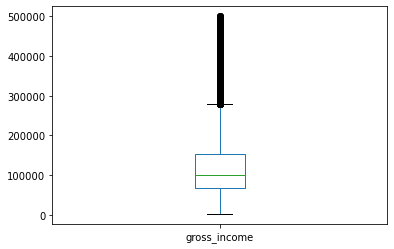

In [27]:
data5.gross_income.plot(kind='box')

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_Products'>

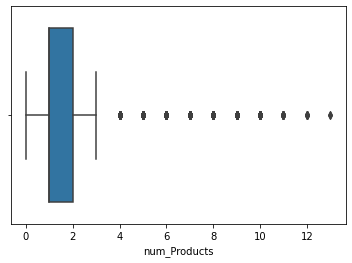

In [28]:
sns.boxplot(data5.num_Products) #num_Products also has outliers - we keep only those rows where the value is less than 6

In [29]:
data6 = data5[data5.num_Products<6]

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_Products'>

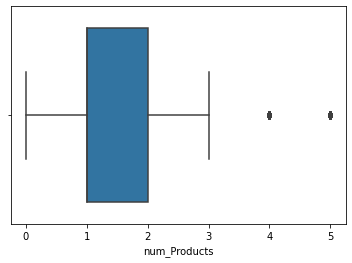

In [30]:
sns.boxplot(data6.num_Products)

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

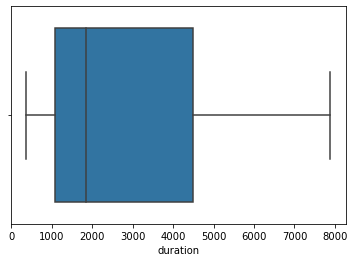

In [31]:
sns.boxplot(data6.duration) #duration does not have any outliers

In [32]:
data6.info() #we have groped 3888 entries to get a total of 50142 entries finally.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50142 entries, 0 to 54029
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    50142 non-null  int32  
 1   gross_income           50142 non-null  float64
 2   num_credit_cards       50142 non-null  int64  
 3   ind_actividad_cliente  50142 non-null  int64  
 4   num_Products           50142 non-null  int64  
 5   num_loans              50142 non-null  int64  
 6   duration               50142 non-null  int64  
 7   gender_M               50142 non-null  uint8  
 8   segment_Individuals    50142 non-null  uint8  
 9   segment_VIP            50142 non-null  uint8  
 10  tiprel_1mes_I          50142 non-null  uint8  
dtypes: float64(1), int32(1), int64(5), uint8(4)
memory usage: 3.1 MB


<AxesSubplot:>

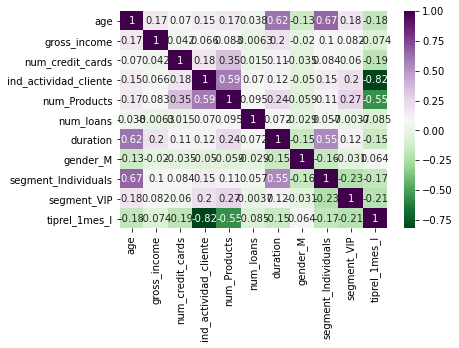

In [33]:
sns.heatmap(data6.corr(),annot=True, cmap='PRGn_r')

In [2]:
data6.to_csv("Processed_data.csv",index=False) #save pre-processed data separately

NameError: name 'data6' is not defined

In [3]:
df = pd.read_csv("Processed_data.csv")

In [36]:
df

,age,gross_income,num_credit_cards,ind_actividad_cliente,num_Products,num_loans,duration,gender_M,segment_Individuals,segment_VIP,tiprel_1mes_I
0,21,79070.91,0,0,1,0,1035,1,1,0,1
1,23,178270.68,0,0,1,0,1097,1,0,0,1
2,24,31243.56,0,1,1,0,1866,1,0,0,1
3,24,130740.54,0,0,1,0,1440,1,0,0,1
4,31,112975.17,0,0,0,0,376,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
50137,24,75405.60,0,0,1,0,1073,1,0,0,1
50138,24,47237.01,0,1,1,0,1147,1,0,0,1
50139,24,185323.05,0,0,0,0,1817,1,0,0,1
50140,27,65246.79,0,0,1,0,1447,0,0,0,1


In [4]:
inactive_to_active = df[(df.tiprel_1mes_I==1) & (df.ind_actividad_cliente==1)] #people who went from inactive to active in the 6 month period

In [5]:
inactive_to_active[inactive_to_active.gender_M==0].age.mean() #mean age of male inactive-to-active customers

42.091197462331486

In [6]:
inactive_to_active[inactive_to_active.gender_M==1].age.mean() #mean age of femaly inactive-to-active customers

36.495076096687555

We can see that Females who went from inactive to active had higher mean age compared to Males.

<AxesSubplot:xlabel='age', ylabel='gender_M'>

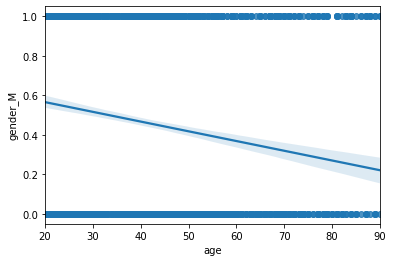

In [7]:
sns.regplot(x=inactive_to_active.age, y = inactive_to_active.gender_M)
#this regression plot also shows this relation - as age increases, the number of males reduces, hence number of females increases.

In [8]:
df.gross_income.mean() #mean income of all customers except outliers.

120915.23369630295

In [9]:
income_over_avg=df[df.gross_income>df.gross_income.mean()] #customers with higher than avg income

In [10]:
income_under_avg = df[df.gross_income<=df.gross_income.mean()] #customers with lower than avg income

In [11]:
#now, we define activity as the sum of number of credit cards, number of loans and number of products.
income_over_avg['activity'] = income_over_avg.num_credit_cards + income_over_avg.num_loans + income_over_avg.num_Products
income_under_avg['activity'] = income_under_avg.num_credit_cards + income_under_avg.num_loans + income_under_avg.num_Products

<ipython-input-11-2b6e544a9b9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_over_avg['activity'] = income_over_avg.num_credit_cards + income_over_avg.num_loans + income_over_avg.num_Products
<ipython-input-11-2b6e544a9b9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_under_avg['activity'] = income_under_avg.num_credit_cards + income_under_avg.num_loans + income_under_avg.num_Products


In [12]:
income_over_avg.activity.describe()
#we see an average activity of 1.478 for people with more than avg income

count    18779.000000
mean         1.478460
std          1.310998
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: activity, dtype: float64

In [13]:
income_under_avg.activity.describe()
#we see an average activity of 1.265 for people with less than avg income

count    31363.000000
mean         1.265313
std          1.104878
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: activity, dtype: float64

In [14]:
#a two sample Z-test to see if there is significant difference between the two activity means - the test statistic suggests indisputable evidence of this.
#hence, there is a significant activity difference between people with lower than or higher than average incomes.
(1.47846 - 1.265313)/np.sqrt((1.311**2/18779) + (1.105**2/31363))

18.661557422982547

In [15]:
active=df[(df.tiprel_1mes_I==0)&(df.ind_actividad_cliente==1)] #customers who were active throughout

In [16]:
active_to_inactive = df[(df.tiprel_1mes_I==0)&(df.ind_actividad_cliente==0)] #customers who became inactive during the 6 month period

In [17]:
active.num_Products.describe() #description of number of products of active customers.

count    19893.000000
mean         2.137988
std          1.220720
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: num_Products, dtype: float64

In [18]:
active_to_inactive.num_Products.describe() #description of number of products of active-to-inactive customers.

count    2034.000000
mean        0.779253
std         0.688563
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: num_Products, dtype: float64

In [31]:
#two sample z-test for num_products between active vs active_to_inactive consumers. Z-statistic suggest indisputable evidence that the means are different.
(2.137988 - 0.779253)/np.sqrt((1.220720**2/19893) + (0.688563**2/2034))

77.4204228127718

In [35]:
#df containing all consistent consumers
consistent = pd.merge(active,inactive,how='outer')

In [40]:
#df containing all inconsistent consumers
inconsistent = pd.merge(active_to_inactive,inactive_to_active,how='outer')

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

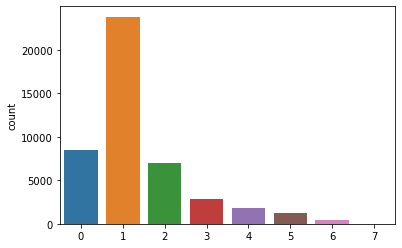

In [58]:
#activity of consistent consumers
sns.countplot(consistent.num_credit_cards+consistent.num_loans+consistent.num_Products)

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

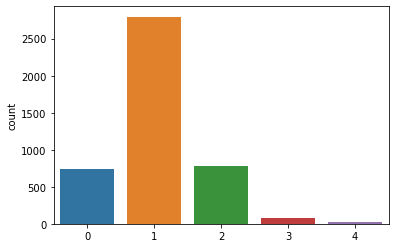

In [48]:
#activity of inconsistent consumers
sns.countplot(inconsistent.num_credit_cards+inconsistent.num_loans+inconsistent.num_Products)

In [53]:
consistent.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45730.0,40.189154,16.442749,20.00,25.0000,39.000,50.00,90.00
gross_income,45730.0,120928.010713,77815.247450,2336.01,67403.3025,99088.305,151459.05,499959.33
num_credit_cards,45730.0,0.029893,0.170294,0.00,0.0000,0.000,0.00,1.00
ind_actividad_cliente,45730.0,0.435010,0.495764,0.00,0.0000,0.000,1.00,1.00
num_Products,45730.0,1.337503,1.145030,0.00,1.0000,1.000,2.00,5.00
num_loans,45730.0,0.005532,0.074175,0.00,0.0000,0.000,0.00,1.00
duration,45730.0,2778.123836,1974.020791,366.00,1090.0000,1840.000,4444.00,7884.00
gender_M,45730.0,0.454887,0.497966,0.00,0.0000,0.000,1.00,1.00
segment_Individuals,45730.0,0.587710,0.492252,0.00,0.0000,1.000,1.00,1.00
segment_VIP,45730.0,0.036694,0.188011,0.00,0.0000,0.000,0.00,1.00


In [95]:
inconsistent.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4412.0,41.590888,17.393707,20.00,25.00,40.000,53.00,90.00
gross_income,4412.0,120782.801015,78499.956558,9049.62,67083.66,99092.565,149823.93,498777.63
num_credit_cards,4412.0,0.004080,0.063750,0.00,0.00,0.000,0.00,1.00
ind_actividad_cliente,4412.0,0.538985,0.498534,0.00,0.00,1.000,1.00,1.00
num_Products,4412.0,1.047371,0.656844,0.00,1.00,1.000,1.00,4.00
num_loans,4412.0,0.005666,0.075070,0.00,0.00,0.000,0.00,1.00
duration,4412.0,2991.237987,2129.632990,366.00,1070.00,2199.000,5017.25,7879.00
gender_M,4412.0,0.433590,0.495626,0.00,0.00,0.000,1.00,1.00
segment_Individuals,4412.0,0.654125,0.475707,0.00,0.00,1.000,1.00,1.00
segment_VIP,4412.0,0.007253,0.084864,0.00,0.00,0.000,0.00,1.00


In [19]:
inactive = df[(df.tiprel_1mes_I==1)&(df.ind_actividad_cliente==0)]

### We now have all 4 segments of customers - active throughout, inactive throughout, active to inactive, and inactive to active
Let's use these dataframes to find more about these 4 segments

<AxesSubplot:ylabel='count'>

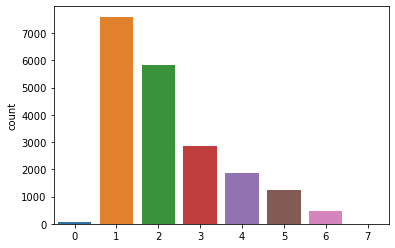

In [20]:
#'activity' of active customers
sns.countplot(x=active.num_Products+active.num_loans+active.num_credit_cards)

<AxesSubplot:ylabel='count'>

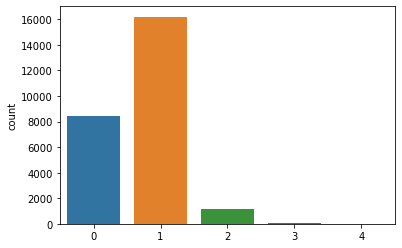

In [21]:
#'activity' of inactive customers
sns.countplot(x=inactive.num_Products+inactive.num_loans+inactive.num_credit_cards)

<AxesSubplot:ylabel='count'>

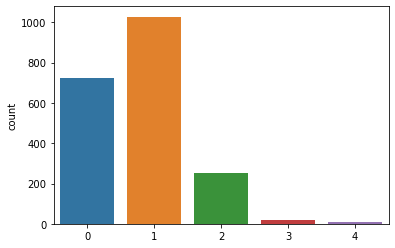

In [22]:
#'activity' of active-to-inactive customers
sns.countplot(x=active_to_inactive.num_Products+active_to_inactive.num_loans+active_to_inactive.num_credit_cards)

<AxesSubplot:ylabel='count'>

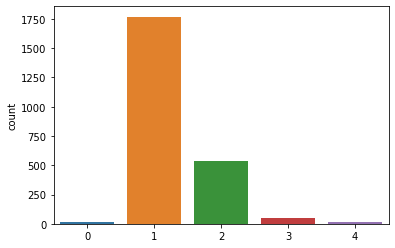

In [23]:
#'activity' of inactive-to-active customers
sns.countplot(x=inactive_to_active.num_Products+inactive_to_active.num_loans+inactive_to_active.num_credit_cards)

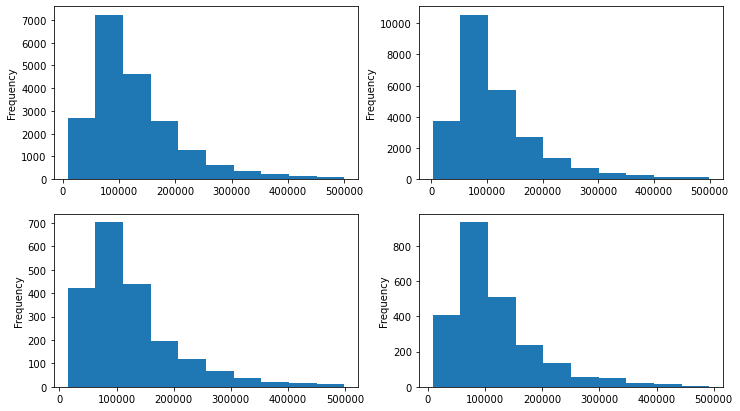

In [93]:
#income comparison
import matplotlib.pyplot as plt
plt.subplots(2,2)
plt.subplot(221)
active.gross_income.plot(kind='hist',figsize=(12,7))
plt.subplot(222)
inactive.gross_income.plot(kind='hist')
plt.subplot(223)
active_to_inactive.gross_income.plot(kind='hist')
plt.subplot(224)
inactive_to_active.gross_income.plot(kind='hist');